In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score, accuracy_score

from src.classifier.expectationMaximisation import ExpectationMaximisation
from src.classifier.kmeans import KMeans
from src.transformers.pca import PCA
from src.transformers.standardScaler import StandardScaler

# Présentation des données et analyse descriptive

In [2]:
df = pd.read_csv('data/SPECTF.csv',
				 names=['OVERALL_DIAGNOSIS', 'F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R', 'F5S',
						'F6R', 'F6S', 'F7R', 'F7S', 'F8R', 'F8S', 'F9R', 'F9S', 'F10R', 'F10S', 'F11R', 'F11S', 'F12R',
						'F12S', 'F13R', 'F13S', 'F14R', 'F14S', 'F15R', 'F15S', 'F16R', 'F16S', 'F17R', 'F17S', 'F18R',
						'F18S', 'F19R', 'F19S', 'F20R', 'F20S', 'F21R', 'F21S', 'F22R', 'F22S'])
df

,OVERALL_DIAGNOSIS,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,1,59,52,70,67,73,66,72,61,58,...,66,56,62,56,72,62,74,74,64,67
1,1,72,62,69,67,78,82,74,65,69,...,65,71,63,60,69,73,67,71,56,58
2,1,71,62,70,64,67,64,79,65,70,...,73,70,66,65,64,55,61,41,51,46
3,1,69,71,70,78,61,63,67,65,59,...,61,61,66,65,72,73,68,68,59,63
4,1,70,66,61,66,61,58,69,69,72,...,67,69,70,66,70,64,60,55,49,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,0,74,69,75,70,70,74,77,77,65,...,66,67,63,61,71,68,66,65,54,57
263,0,72,61,64,66,64,59,68,66,76,...,69,64,67,71,69,68,65,73,56,52
264,0,75,73,72,77,68,67,76,73,67,...,70,67,72,71,79,75,77,75,67,71
265,0,59,62,72,74,66,66,74,76,63,...,65,71,67,69,77,78,77,76,70,70


In [3]:
labels = df.OVERALL_DIAGNOSIS
df.drop(columns=['OVERALL_DIAGNOSIS'], inplace=True)

# df = df.loc[:, ['Age','Height','Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
df

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,59,52,70,67,73,66,72,61,58,52,...,66,56,62,56,72,62,74,74,64,67
1,72,62,69,67,78,82,74,65,69,63,...,65,71,63,60,69,73,67,71,56,58
2,71,62,70,64,67,64,79,65,70,69,...,73,70,66,65,64,55,61,41,51,46
3,69,71,70,78,61,63,67,65,59,59,...,61,61,66,65,72,73,68,68,59,63
4,70,66,61,66,61,58,69,69,72,68,...,67,69,70,66,70,64,60,55,49,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,74,69,75,70,70,74,77,77,65,67,...,66,67,63,61,71,68,66,65,54,57
263,72,61,64,66,64,59,68,66,76,66,...,69,64,67,71,69,68,65,73,56,52
264,75,73,72,77,68,67,76,73,67,65,...,70,67,72,71,79,75,77,75,67,71
265,59,62,72,74,66,66,74,76,63,67,...,65,71,67,69,77,78,77,76,70,70


In [4]:
df.describe()

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,...,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000,267.000000
mean,66.183521,64.913858,68.677903,69.078652,64.801498,63.966292,70.168539,69.389513,63.295880,62.232210,...,63.906367,62.584270,65.247191,64.198502,65.902622,64.052434,62.438202,60.411985,52.580524,50.535581
std,8.250315,9.444937,6.593543,8.394267,8.826328,9.479835,8.355678,9.497030,9.020783,9.340188,...,7.937410,10.948075,7.885383,9.251393,12.086696,12.693505,14.436760,15.200500,12.809920,14.548133
min,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,22.000000,...,18.000000,13.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,11.000000,4.000000
25%,62.000000,60.000000,65.000000,66.000000,61.000000,60.000000,68.000000,67.000000,61.000000,58.000000,...,62.000000,61.000000,62.000000,60.000000,62.500000,60.000000,59.500000,56.000000,49.000000,45.000000
50%,67.000000,66.000000,69.000000,71.000000,66.000000,66.000000,72.000000,72.000000,65.000000,64.000000,...,66.000000,65.000000,66.000000,66.000000,69.000000,67.000000,67.000000,65.000000,56.000000,55.000000
75%,71.500000,71.000000,73.000000,74.000000,70.000000,70.000000,75.000000,75.000000,68.000000,68.000000,...,68.000000,69.000000,71.000000,71.000000,73.000000,72.000000,72.000000,70.000000,61.000000,60.000000
max,83.000000,81.000000,82.000000,84.000000,82.000000,89.000000,85.000000,83.000000,77.000000,78.000000,...,76.000000,77.000000,80.000000,79.000000,83.000000,81.000000,82.000000,83.000000,82.000000,73.000000


In [5]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_147821/2410076008.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,F6R,F6S,F7R,F7S,F8R,F8S,F9R,F9S,F10R,F10S,F11R,F11S,F12R,F12S,F13R,F13S,F14R,F14S,F15R,F15S,F16R,F16S,F17R,F17S,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
F1R,1.00,0.59,0.36,0.36,0.19,0.21,0.57,0.40,0.50,0.39,0.24,0.18,0.04,0.08,0.12,0.15,0.41,0.37,0.11,0.16,0.16,0.10,0.04,0.07,0.06,0.02,0.12,0.05,0.40,0.31,0.15,0.19,0.06,-0.02,0.36,0.29,0.26,0.21,0.40,0.29,0.07,0.08,0.00,0.04
F1S,0.59,1.00,0.29,0.46,0.07,0.32,0.40,0.53,0.41,0.60,0.25,0.43,0.02,0.10,-0.01,0.11,0.29,0.37,0.11,0.26,0.08,0.18,-0.03,0.10,0.01,0.04,0.10,0.15,0.41,0.47,0.18,0.25,0.02,0.08,0.33,0.39,0.24,0.45,0.35,0.46,0.05,0.07,-0.00,0.07
F2R,0.36,0.29,1.00,0.62,0.18,0.16,0.29,0.15,0.25,0.24,0.45,0.35,0.25,0.26,0.08,0.06,0.16,0.11,0.12,0.09,0.16,0.16,0.10,0.13,0.11,0.12,0.08,0.05,0.33,0.23,0.45,0.30,0.26,0.07,0.16,0.15,0.25,0.24,0.29,0.24,0.16,0.13,0.09,0.10
F2S,0.36,0.46,0.62,1.00,0.12,0.26,0.24,0.25,0.31,0.36,0.39,0.52,0.24,0.41,-0.00,0.11,0.10,0.06,0.17,0.27,0.20,0.24,0.19,0.31,0.17,0.15,0.09,-0.02,0.32,0.40,0.46,0.61,0.27,0.35,0.15,0.21,0.17,0.32,0.28,0.40,0.16,0.19,0.13,0.15
F3R,0.19,0.07,0.18,0.12,1.00,0.67,0.28,0.33,0.22,0.17,0.06,0.08,0.39,0.31,0.55,0.46,0.23,0.16,0.20,0.09,0.06,0.05,0.27,0.26,0.43,0.40,0.12,0.04,0.29,0.27,0.12,0.14,0.09,0.10,0.28,0.24,-0.02,-0.08,0.34,0.21,0.48,0.44,0.37,0.36
F3S,0.21,0.32,0.16,0.26,0.67,1.00,0.34,0.61,0.20,0.31,0.10,0.19,0.41,0.42,0.59,0.67,0.30,0.30,0.19,0.17,0.04,0.21,0.31,0.39,0.52,0.58,0.13,0.23,0.42,0.52,0.25,0.34,0.14,0.23,0.39,0.49,0.01,0.08,0.41,0.46,0.59,0.67,0.45,0.55
F4R,0.57,0.40,0.29,0.24,0.28,0.34,1.00,0.65,0.54,0.39,0.23,0.15,0.04,-0.03,0.30,0.35,0.68,0.61,0.19,0.16,0.20,0.08,0.04,0.02,0.15,0.14,0.35,0.26,0.45,0.42,0.11,0.15,-0.02,0.01,0.61,0.50,0.36,0.22,0.60,0.44,0.20,0.20,0.07,0.13
F4S,0.40,0.53,0.15,0.25,0.33,0.61,0.65,1.00,0.32,0.44,0.11,0.16,0.16,0.16,0.41,0.51,0.56,0.63,0.17,0.18,0.08,0.18,0.10,0.17,0.31,0.31,0.26,0.33,0.59,0.62,0.16,0.17,-0.02,0.01,0.62,0.71,0.18,0.29,0.59,0.61,0.37,0.40,0.25,0.32
F5R,0.50,0.41,0.25,0.31,0.22,0.20,0.54,0.32,1.00,0.74,0.50,0.41,0.27,0.15,0.32,0.36,0.63,0.60,0.46,0.43,0.28,0.18,0.15,0.08,0.22,0.13,0.34,0.14,0.44,0.40,0.26,0.26,0.07,0.13,0.52,0.44,0.46,0.41,0.48,0.35,0.19,0.14,0.08,0.09
F5S,0.39,0.60,0.24,0.36,0.17,0.31,0.39,0.44,0.74,1.00,0.41,0.56,0.28,0.25,0.30,0.31,0.55,0.62,0.30,0.47,0.15,0.28,0.08,0.13,0.19,0.17,0.27,0.23,0.47,0.53,0.28,0.27,0.05,0.14,0.50,0.56,0.34,0.53,0.42,0.47,0.17,0.16,0.08,0.13


## Exploration des données par l’ACP normée

In [6]:
df = StandardScaler().fit_transform(df)
df.describe()

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,...,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02,2.670000e+02
mean,-5.189357e-16,-5.322417e-16,-6.653022e-16,5.322417e-16,3.393041e-16,-1.929376e-16,-5.788129e-16,-6.586492e-16,2.860799e-16,-1.197544e-16,...,2.295293e-16,-1.995907e-16,-2.328558e-17,-3.226716e-16,-4.590585e-16,2.228762e-16,-2.444986e-16,1.663255e-16,-2.195497e-16,1.397135e-16
std,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,...,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00,1.001878e+00
min,-5.243996e+00,-4.658191e+00,-4.661456e+00,-4.186730e+00,-4.971915e+00,-4.118159e+00,-5.895497e+00,-5.210288e+00,-5.697090e+00,-4.315520e+00,...,-5.794406e+00,-4.537545e+00,-4.097169e+00,-5.003059e+00,-4.550931e+00,-4.581985e+00,-3.986079e+00,-3.454519e+00,-3.252059e+00,-3.204739e+00
25%,-5.080263e-01,-5.212407e-01,-5.588512e-01,-3.674452e-01,-4.315087e-01,-4.191782e-01,-2.600162e-01,-2.520789e-01,-2.549880e-01,-4.539692e-01,...,-2.406260e-01,-1.449793e-01,-4.125721e-01,-4.546760e-01,-2.820466e-01,-3.198521e-01,-2.039045e-01,-2.907977e-01,-2.800367e-01,-3.812157e-01
50%,9.914927e-02,1.152133e-01,4.894216e-02,2.293180e-01,1.360422e-01,2.149327e-01,2.195992e-01,2.753902e-01,1.892652e-01,1.896225e-01,...,2.642631e-01,2.210678e-01,9.564820e-02,1.950929e-01,2.567447e-01,2.326466e-01,3.165783e-01,3.024000e-01,2.674409e-01,3.074486e-01
75%,6.456073e-01,6.455916e-01,6.567355e-01,5.873759e-01,5.900828e-01,6.376734e-01,5.793107e-01,5.918717e-01,5.224551e-01,6.186837e-01,...,5.167077e-01,5.871149e-01,7.309236e-01,7.365670e-01,5.883085e-01,6.272886e-01,6.635668e-01,6.319543e-01,6.584964e-01,6.517808e-01
max,2.042111e+00,1.706348e+00,2.024271e+00,1.780902e+00,1.952205e+00,2.645691e+00,1.778349e+00,1.435822e+00,1.522025e+00,1.691337e+00,...,1.526486e+00,1.319209e+00,1.874419e+00,1.602926e+00,1.417218e+00,1.337644e+00,1.357544e+00,1.488795e+00,2.300930e+00,1.547044e+00


In [7]:
pca = PCA(2)
pca.fit(df)

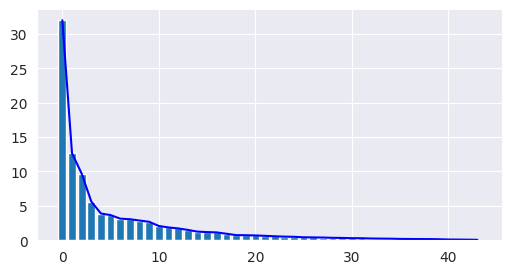

In [8]:
plt.figure(figsize=(6, 3))

plt.bar(range(len(pca.eigenvalues)), pca.eigenvalues / sum(pca.eigenvalues) * 100)
plt.plot(range(len(pca.eigenvalues)), pca.eigenvalues / sum(pca.eigenvalues) * 100, c='b')
# plt.plot()

44.65616625499438


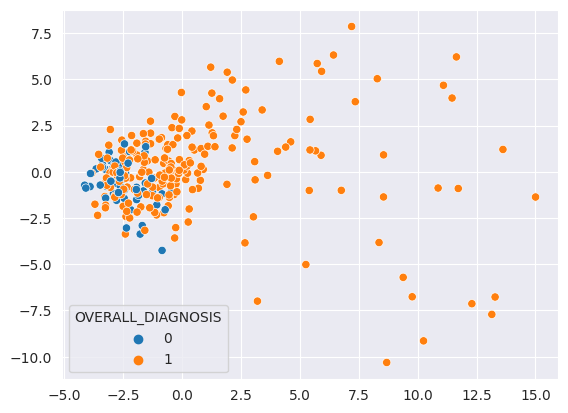

In [9]:
pca.set_n_components(2)
plotting_df = pca.transform(df)

sns.scatterplot(x=plotting_df[:, 0], y=plotting_df[:, 1], hue=labels)

print(sum((pca.eigenvalues / sum(pca.eigenvalues) * 100)[:2]))

<AxesSubplot: >

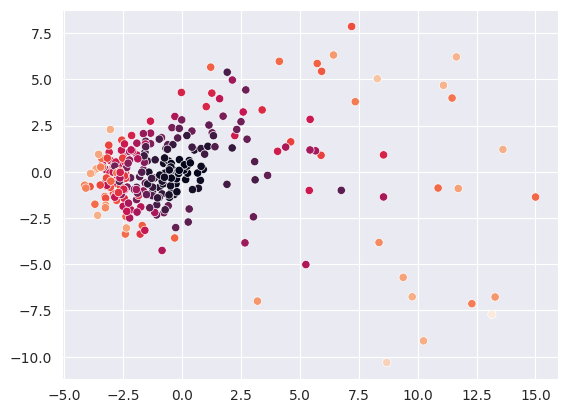

In [10]:
quality = pca.individual_quality(df)

sns.scatterplot(x=plotting_df[:, 0], y=plotting_df[:, 1], c=quality)

In [11]:
print(f"Les index des individus typique pour l'axe 0 sont : {plotting_df[:, 0].argmin()}, {plotting_df[:, 0].argmax()}")
print(f"Les index des individus typique pour l'axe 1 sont : {plotting_df[:, 1].argmin()}, {plotting_df[:, 1].argmax()}")

Les index des individus typique pour l'axe 0 sont : 50, 237
Les index des individus typique pour l'axe 1 sont : 221, 93


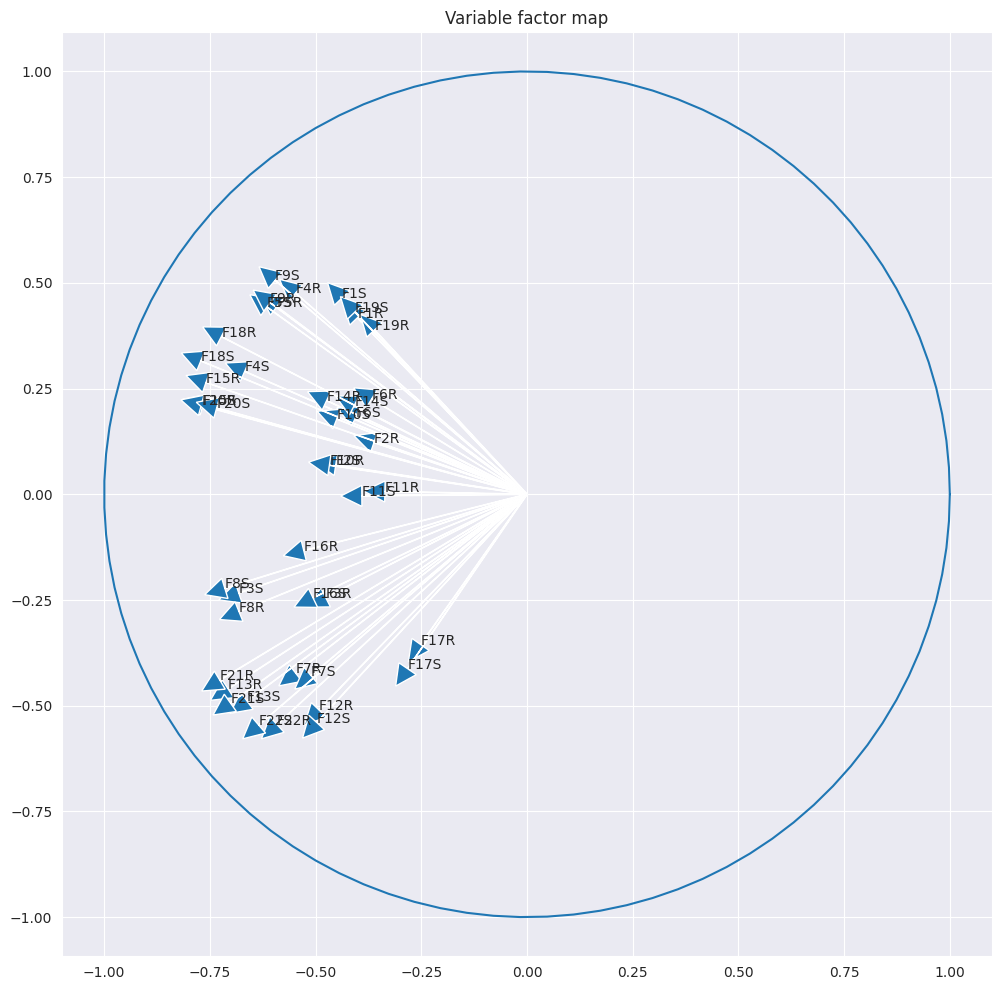

In [12]:
saturations = pca.get_saturations()

(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(len(pca.eigenvalues)):
	ax.arrow(0, 0,  # Start the arrow at the origin
			 saturations[i, 0], saturations[i, 1],  # 0 and 1 correspond to dimension 1 and 2
			 head_width=0.05, head_length=0.05)
	plt.text(saturations[i, 0], saturations[i, 1], df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()


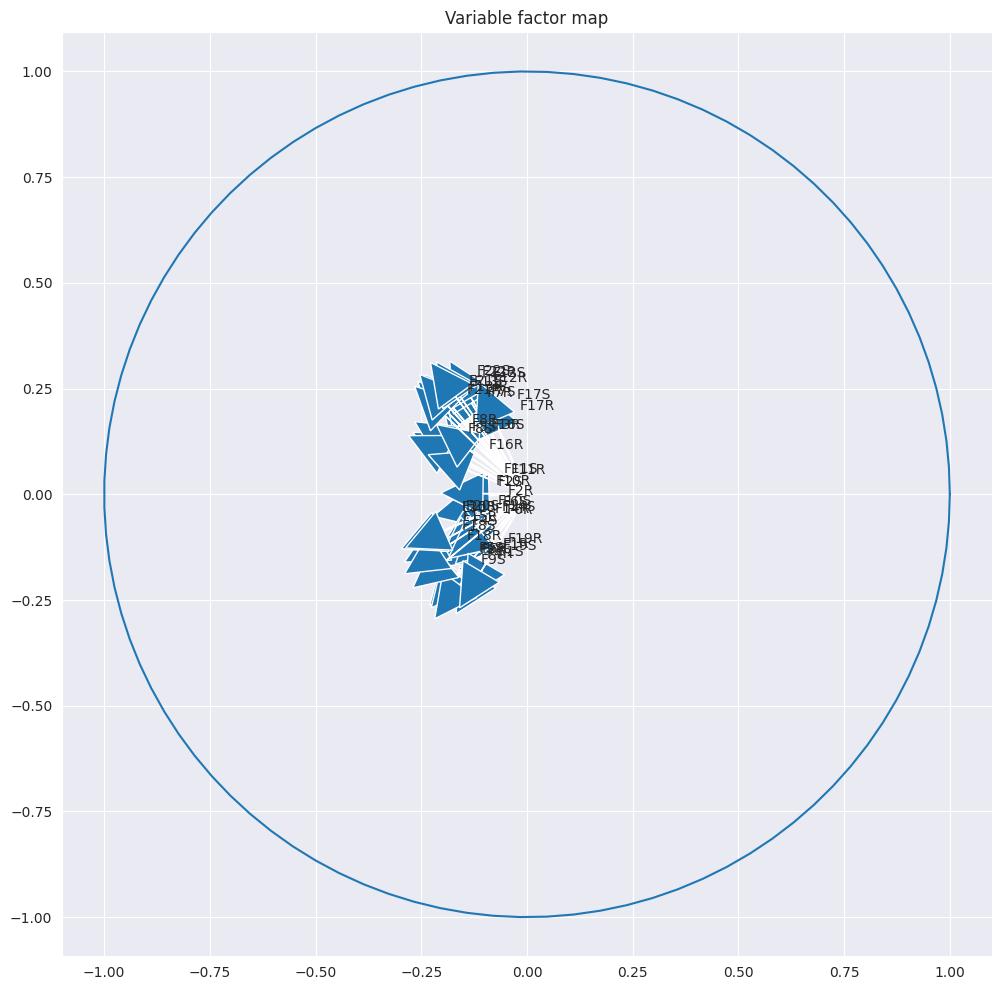

In [13]:
from sklearn.decomposition import PCA as skPCA
skpca = skPCA()
skpca.fit(df)
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(12, 12))
for i in range(len(skpca.components_)):
	ax.arrow(0, 0,  # Start the arrow at the origin
	         skpca.components_[0, i], skpca.components_[1, i],  # 0 and 1 correspond to dimension 1 and 2
	         head_width=0.1, head_length=0.1)
	plt.text(skpca.components_[0, i] + 0.05, skpca.components_[1, i] + 0.05, df.columns.values[i])

an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
plt.plot(np.cos(an), np.sin(an))
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

<AxesSubplot: >

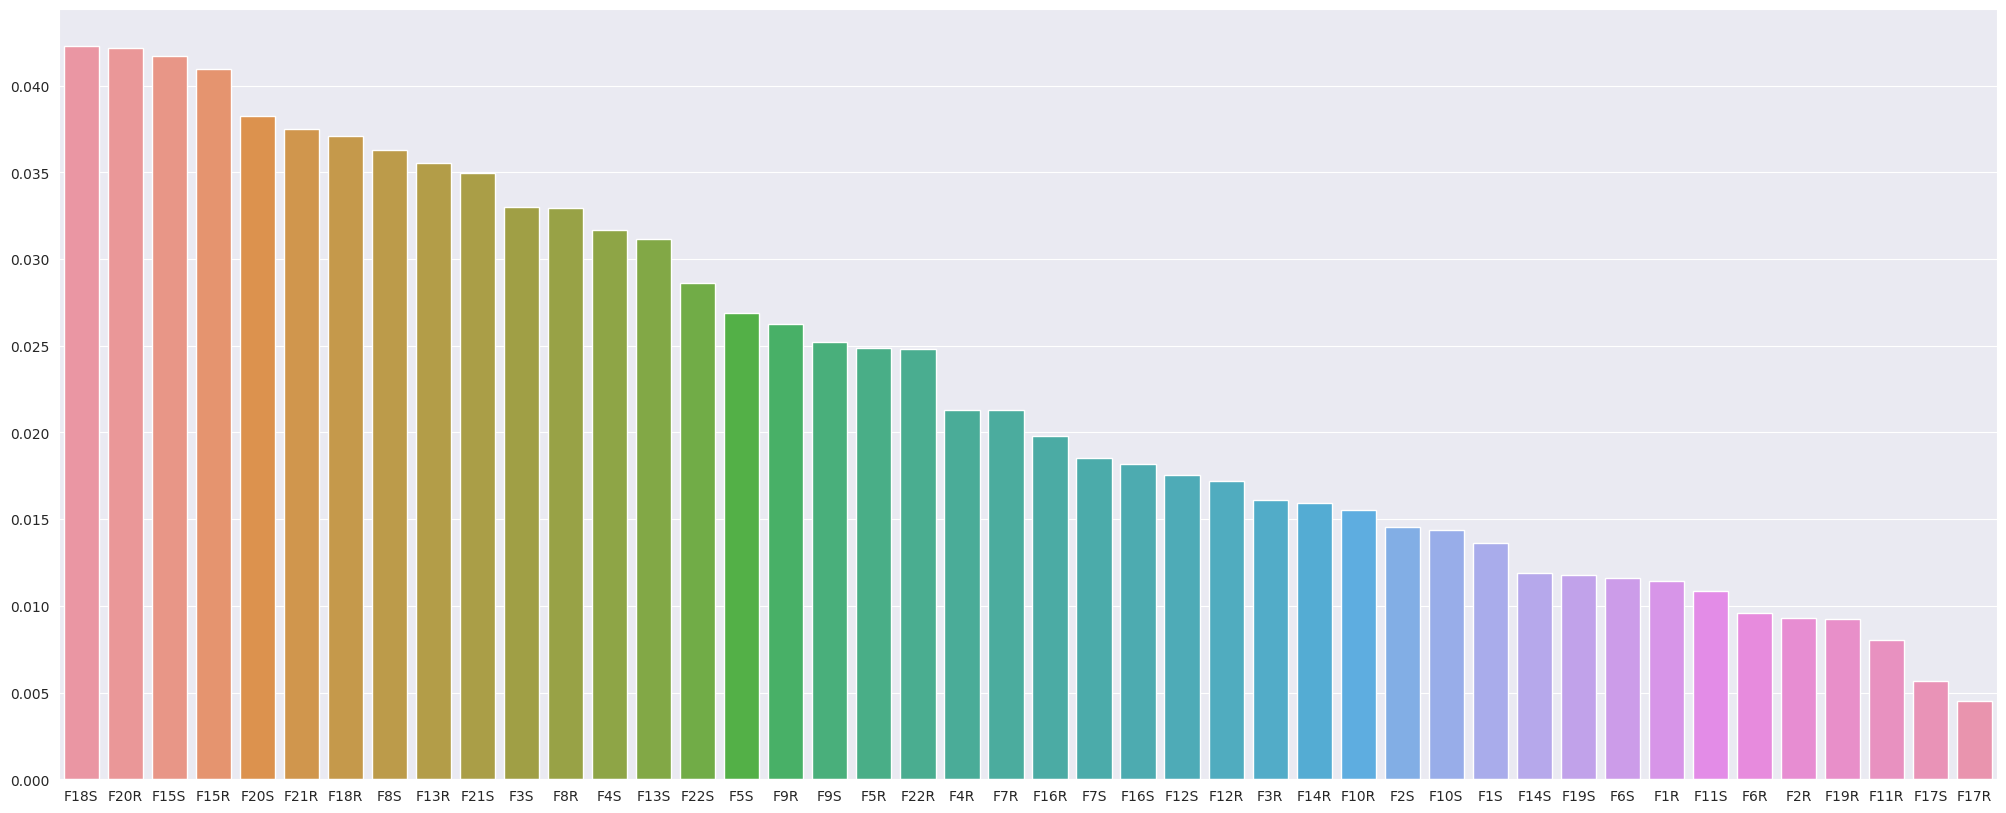

In [14]:
contrib_vars = np.square(pca.eigenvectors)
idx = np.argsort(contrib_vars, axis=0)[::-1]

plt.subplots(figsize=(25, 10))
sns.barplot(x=df.columns[idx[:, 0]], y = contrib_vars[idx[:, 0], 0])

<AxesSubplot: >

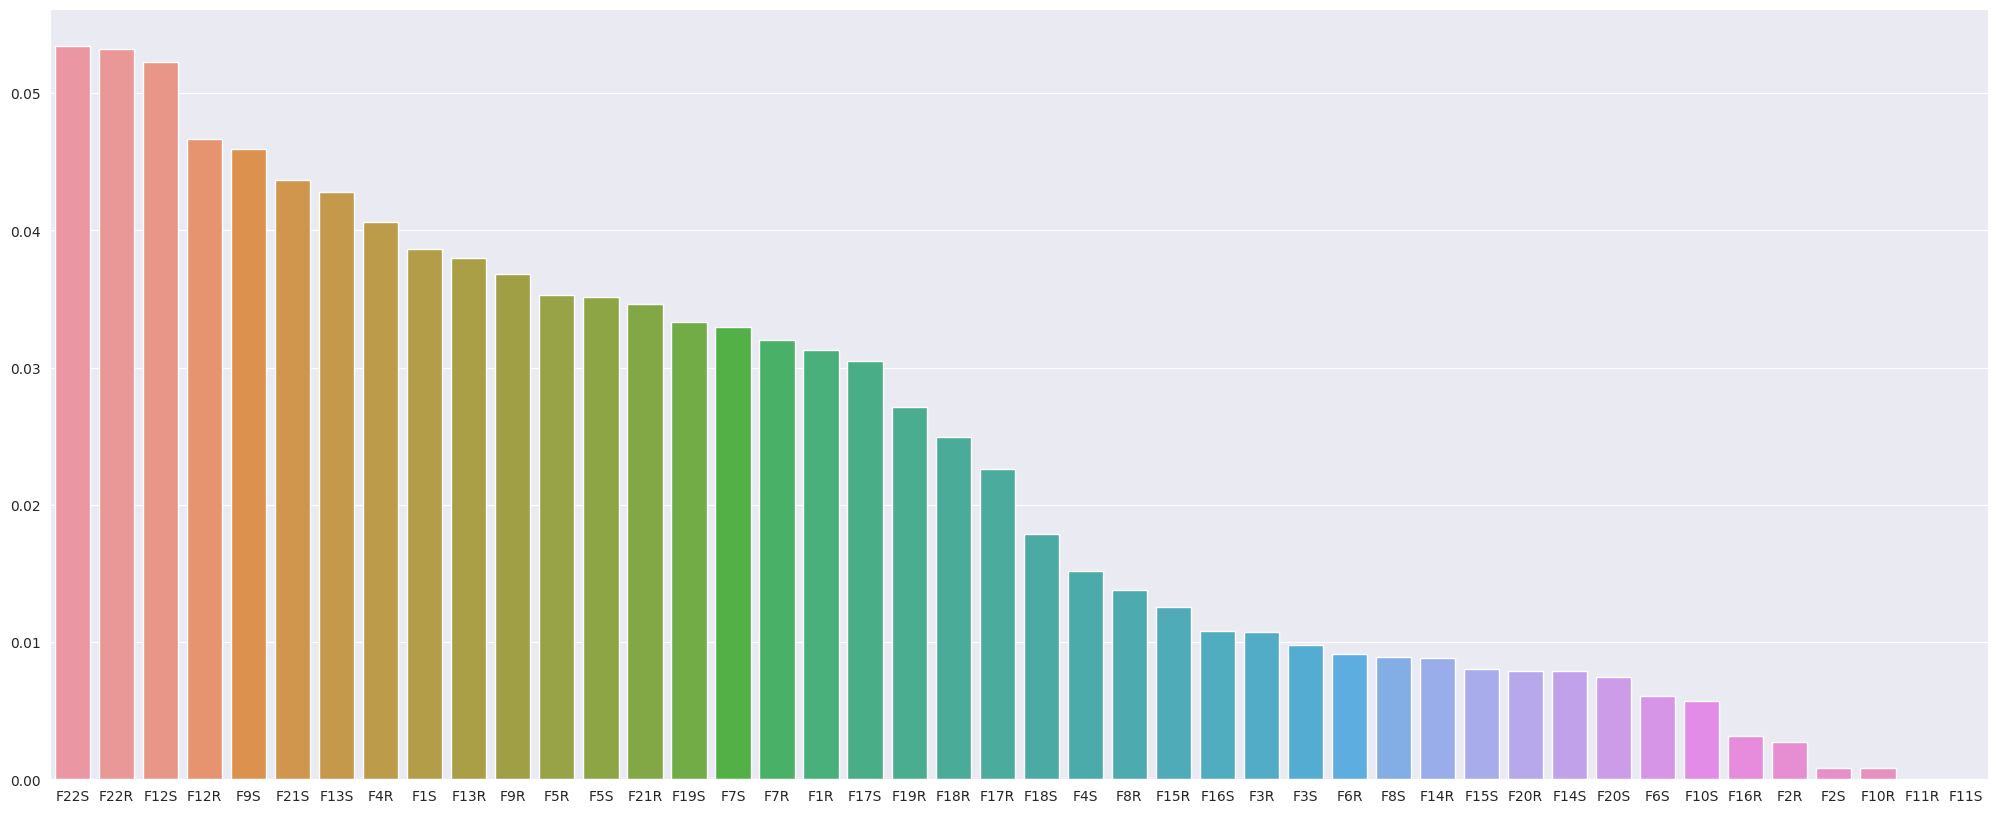

In [15]:
plt.subplots(figsize=(25, 10))
sns.barplot(x=df.columns[idx[:, 1]], y = contrib_vars[idx[:, 1], 1])

In [16]:
pca.set_n_components(4)
df = pca.transform(df)

sum((pca.eigenvalues / sum(pca.eigenvalues) * 100)[:4])

59.98535986901467

## Kmeans

In [17]:
kmeans = KMeans(2)
kmeans.fit(df)

Converged


<AxesSubplot: >

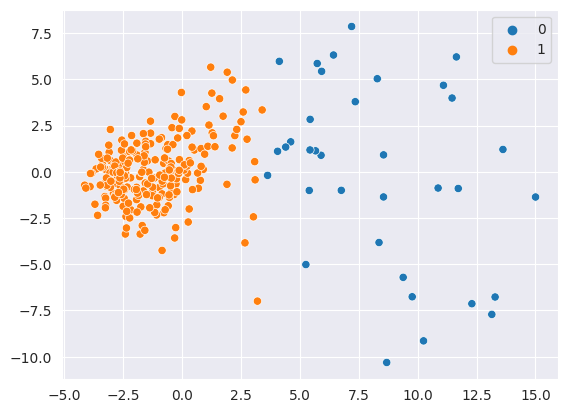

In [18]:
sns.scatterplot(x=plotting_df[:, 0], y=plotting_df[:, 1], hue=kmeans.labels_)

## Spectral

In [19]:
spectral = SpectralClustering(n_clusters=2, eigen_solver='arpack', affinity="nearest_neighbors")
spectral.fit(df)


SpectralClustering(affinity='nearest_neighbors', eigen_solver='arpack',
                   n_clusters=2)

<AxesSubplot: >

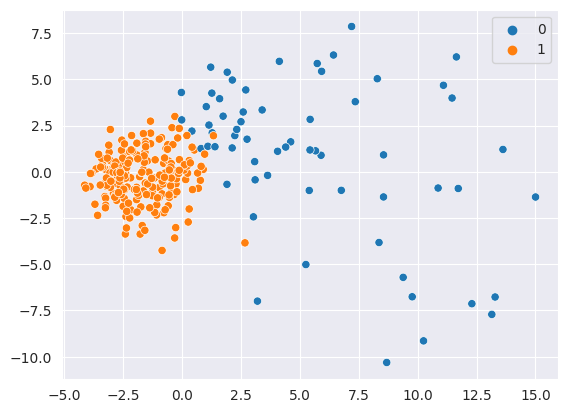

In [20]:
sns.scatterplot(x=plotting_df[:, 0], y=plotting_df[:, 1], hue=spectral.labels_)

## EM

In [21]:
em = ExpectationMaximisation(2)
em.fit(plotting_df)


<AxesSubplot: >

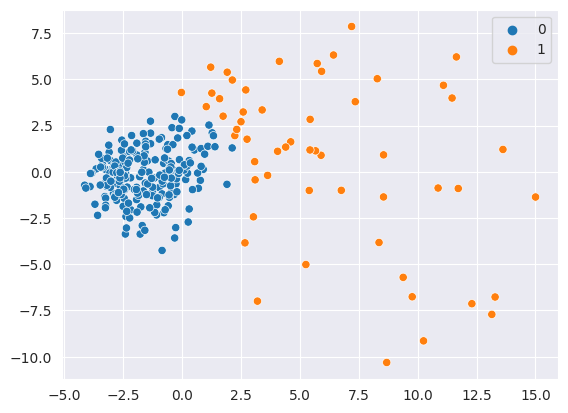

In [22]:
sns.scatterplot(x=plotting_df[:, 0], y=plotting_df[:, 1], hue=em.labels_)

<AxesSubplot: >

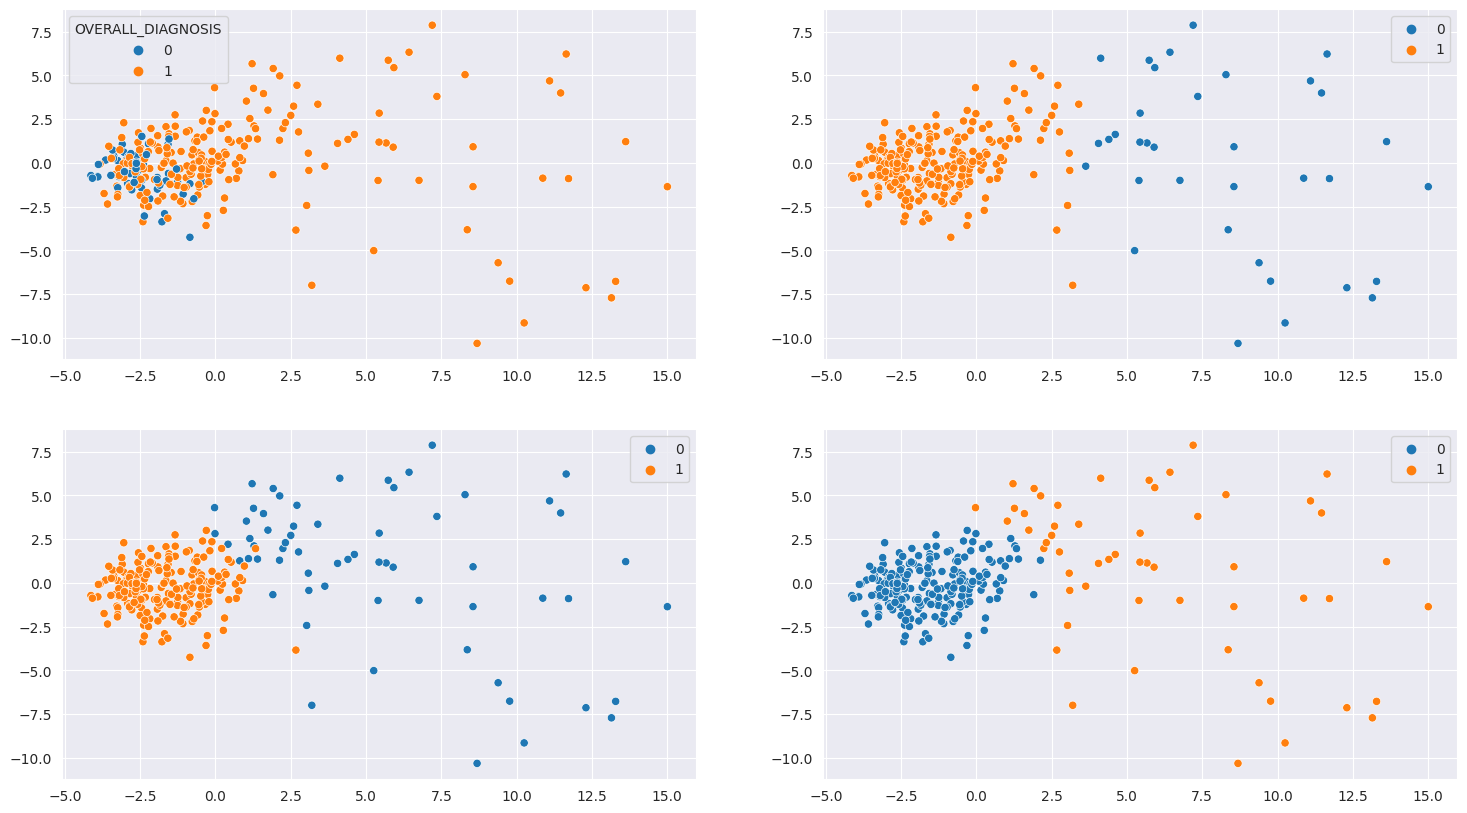

In [23]:
figure, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.scatterplot(ax=axes[0, 0], x=plotting_df[:, 0], y=plotting_df[:, 1], hue=labels)
sns.scatterplot(ax=axes[0, 1], x=plotting_df[:, 0], y=plotting_df[:, 1], hue=kmeans.labels_)
sns.scatterplot(ax=axes[1, 0], x=plotting_df[:, 0], y=plotting_df[:, 1], hue=spectral.labels_)
sns.scatterplot(ax=axes[1, 1], x=plotting_df[:, 0], y=plotting_df[:, 1], hue=em.labels_)

In [24]:
print(silhouette_score(df, kmeans.labels_),
	  silhouette_score(df, spectral.labels_),
	  silhouette_score(df, em.labels_))

0.5737777064076838 0.47005096277664515 0.5050045599224001


In [25]:

print(adjusted_rand_score(labels, kmeans.labels_),
	  adjusted_rand_score(labels, spectral.labels_),
	  adjusted_rand_score(labels, kmeans.labels_))

-0.1026042961417461 -0.09394416474059561 -0.1026042961417461


In [26]:
print(accuracy_score(labels, kmeans.labels_),
	  accuracy_score(labels, spectral.labels_),
	  accuracy_score(labels, kmeans.labels_))

0.6629213483146067 0.5580524344569289 0.6629213483146067
